# Analyses of Trait TPCs

In [3]:
rm(list=ls())
graphics.off()
#unlink("../results/*") # remove all existing results files
#unlink("../results/Figs/*") # remove all existing results plots
#unlink("../results/SI/*")

require('tidyverse')
require('ggtext')
require('cowplot')
require('patchwork')

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggtext

Loading required package: cowplot


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




## Development rate (1/$\alpha$)

In [4]:
# load in raw data
df <- as_tibble(read.csv('../data/TraitData.csv')) 
dv <- df %>% select(interactor1, interactor1temp, standardisedtraitname, standardisedtraitvalue) %>%
  rename(species = interactor1, temp = interactor1temp, alpha = standardisedtraitvalue) %>%
  filter(standardisedtraitname == '1/alpha', alpha != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,alpha
<chr>,<dbl>,<chr>,<dbl>
Paracoccus marginatus,15,1/alpha,0.00100000
Paracoccus marginatus,18,1/alpha,0.01949318
Paracoccus marginatus,20,1/alpha,0.03174603
Paracoccus marginatus,25,1/alpha,0.05813953
Paracoccus marginatus,30,1/alpha,0.06289308
Paracoccus marginatus,34,1/alpha,0.00100000


In [5]:
#load in predictions and invert alpha (1/alpha)

AlphaPredictions <- as_tibble(read_csv('../data/AlphaPredictions.csv')) %>% 
  mutate(alpha = 1/alpha, alphaLwr = 1/alphaLwr, alphaUpr = 1/alphaUpr)

head(AlphaPredictions)

Rows: 51000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, alpha, alphaLwr, alphaUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,alpha,alphaLwr,alphaUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aedes albopictus,1/alpha,0.00000000,0.003707215,0.0008185747,0.006768788
1,Aedes albopictus,1/alpha,0.04504505,0.003729764,0.0008261560,0.006802078
1,Aedes albopictus,1/alpha,0.09009009,0.003752444,0.0008338050,0.006835519
1,Aedes albopictus,1/alpha,0.13513514,0.003775253,0.0008414337,0.006869114
1,Aedes albopictus,1/alpha,0.18018018,0.003798194,0.0008488369,0.006902863
1,Aedes albopictus,1/alpha,0.22522523,0.003821266,0.0008563029,0.006936767


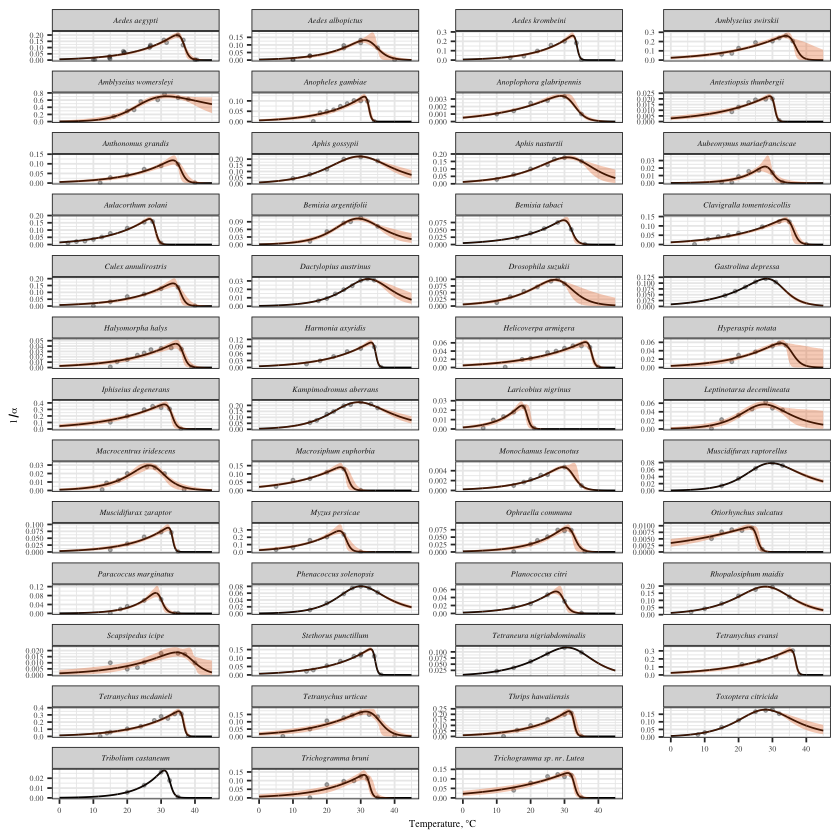

In [6]:
AlphaPlot <- ggplot(AlphaPredictions) +
  geom_line(aes(temp, alpha)) +
  geom_point(aes(temp, alpha), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, scales = 'free_y', ncol = 4) +
  theme_bw()+
  geom_ribbon(aes(temp, ymin=alphaLwr, ymax=alphaUpr), AlphaPredictions, fill="#e66101",alpha=0.3,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'), strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(1/alpha)), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

AlphaPlot

save_plot(AlphaPlot, file="../results/SI/AlphaFits.pdf", base_height=22,base_width = 14, base_asp = 0.75,units="cm")

## Fecundity ($b_{max}$)

In [7]:
# fecundity 

dv <- df %>% select(interactor1, interactor1temp, standardisedtraitname, standardisedtraitvalue) %>%
  rename(species = interactor1, temp = interactor1temp, bmax = standardisedtraitvalue) %>%
  filter(standardisedtraitname == 'bmax', bmax != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,bmax
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,bmax,1.3660477
Acyrthosiphon pisum,15,bmax,2.8697318
Acyrthosiphon pisum,20,bmax,3.9556962
Acyrthosiphon pisum,25,bmax,5.1559633
Acyrthosiphon pisum,30,bmax,0.5421687
Paracoccus marginatus,15,bmax,0.0010000


In [8]:
# load in predictions
bmaxPredictions <- as_tibble(read_csv('../data/BetaPredictions.csv'))

head(bmaxPredictions)

Rows: 44000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, bmax, bmaxLwr, bmaxUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,bmax,bmaxLwr,bmaxUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bemisia tabaci,bmax,0.00000000,0.9231514,0.1645197,3.207111
1,Bemisia tabaci,bmax,0.04504505,0.9267665,0.1656117,3.211869
1,Bemisia tabaci,bmax,0.09009009,0.9303947,0.1667330,3.216633
1,Bemisia tabaci,bmax,0.13513514,0.9340358,0.1678616,3.221401
1,Bemisia tabaci,bmax,0.18018018,0.9376900,0.1689975,3.226176
1,Bemisia tabaci,bmax,0.22522523,0.9413573,0.1701406,3.230955


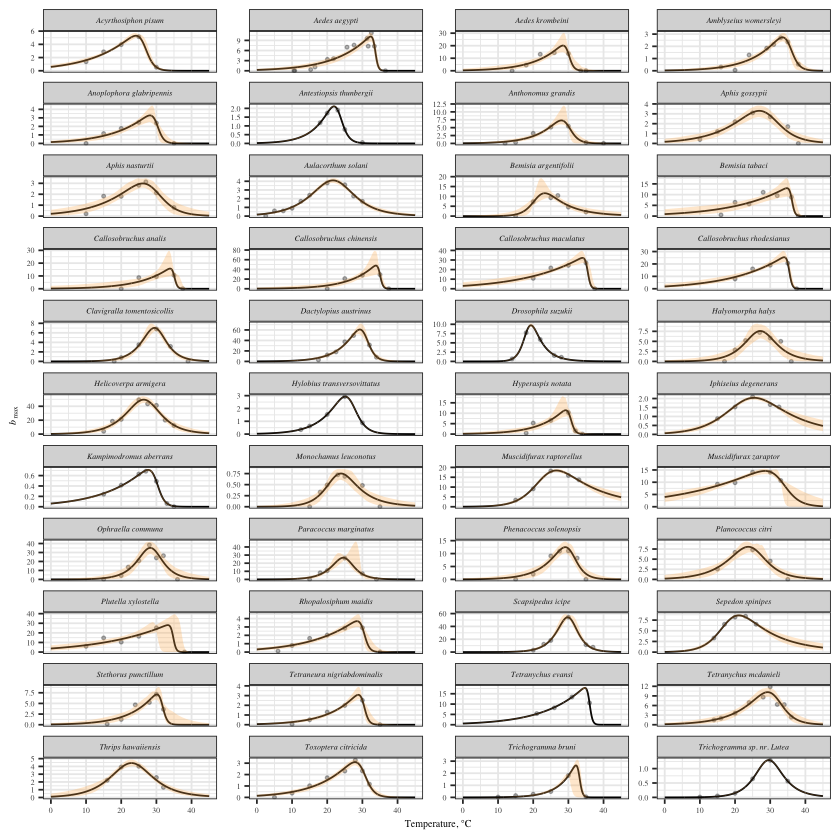

In [9]:
bmaxPlot <- ggplot(bmaxPredictions) +
  geom_line(aes(temp, bmax)) +
  geom_point(aes(temp, bmax), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, scales = 'free_y', ncol = 4) +
  theme_bw() +
  geom_ribbon(aes(temp, ymin=bmaxLwr, ymax=bmaxUpr), bmaxPredictions, fill="#fdb863",alpha=0.3,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'))+
  theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(b)[max]), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none'); bmaxPlot


save_plot(bmaxPlot, file="../results/SI/bmaxFits.pdf",  
          base_height=18,base_width = 14, base_asp = 0.75,units="cm")

## Juvenile mortality rate ($z_J$) 

In [10]:
dv <- df %>% rename(temp = interactor1temp, species = interactor1, zj = standardisedtraitvalue) %>%
  select(species, temp, standardisedtraitname, zj) %>% 
  filter(standardisedtraitname == 'zj', zj != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,zj
<chr>,<dbl>,<chr>,<dbl>
Acyrthosiphon pisum,10,zj,0.010
Acyrthosiphon pisum,15,zj,0.004
Acyrthosiphon pisum,20,zj,0.022
Paracoccus marginatus,15,zj,0.020
Paracoccus marginatus,18,zj,0.009
Paracoccus marginatus,20,zj,0.013


In [11]:
# load in predictions
zJPredictions <- as_tibble(read_csv('../data/zJPredictions.csv'))

# truncate fits for plotting 
zJPredictions <- zJPredictions %>%
  mutate_at(vars(c(zj)), 
            ~ifelse(zj > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zjLwr)), 
            ~ifelse(zjLwr > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zjUpr)), 
            ~ifelse(zjUpr > 0.2, 0.2, .)) 

zJPredictions <- zJPredictions %>% filter(zj < 0.2)

head(zJPredictions)

Rows: 34000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, zj, zjLwr, zjUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,zj,zjLwr,zjUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Toxoptera citricida,zj,2.927928,0.1972161,0.2,0.05774868
1,Toxoptera citricida,zj,2.972973,0.1844287,0.2,0.05522484
1,Toxoptera citricida,zj,3.018018,0.1724773,0.2,0.05281343
1,Toxoptera citricida,zj,3.063063,0.1613070,0.2,0.05050942
1,Toxoptera citricida,zj,3.108108,0.1508665,0.2,0.04830801
1,Toxoptera citricida,zj,3.153153,0.1411080,0.2,0.04620462


Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


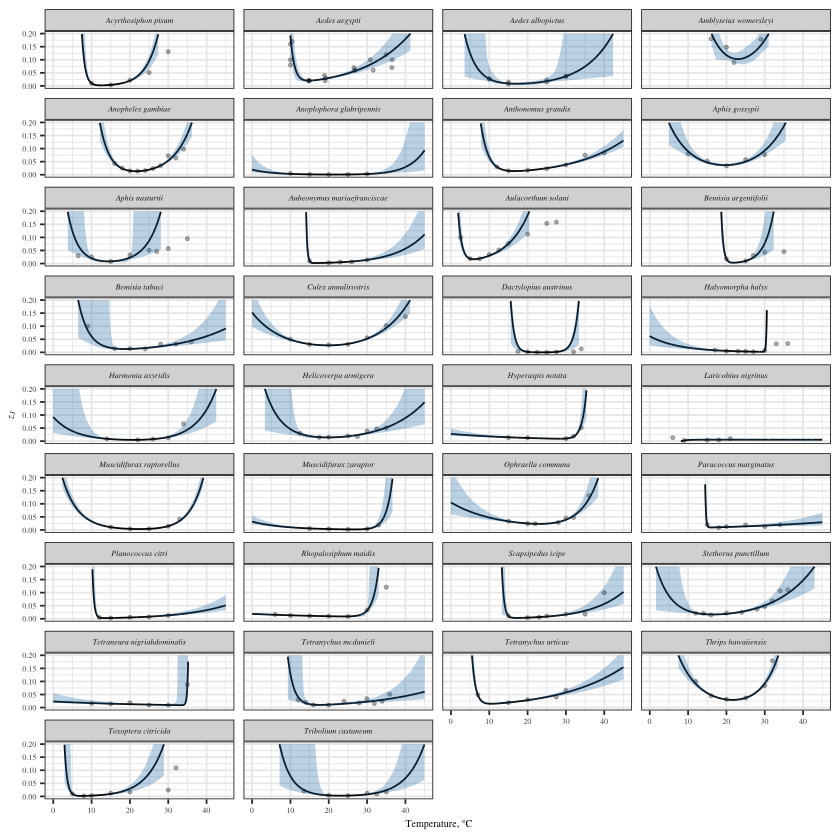

In [12]:
zJPlot <- ggplot(zJPredictions) +
  geom_line(aes(temp, zj)) +
  geom_point(aes(temp, zj), dv, size = 0.75, alpha =0.3) +
  scale_y_continuous(limits=c(-0.001,0.2))+
  facet_wrap(~species, ncol = 4) +
  theme_bw() +
  geom_ribbon(aes(temp, ymin=zjLwr, ymax=zjUpr), zJPredictions, fill="#1f78b4",alpha=0.3,
              inherit.aes = F)+
  theme(text = element_text(size=6, family='Times'))+theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(z[J])), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

zJPlot

save_plot(zJPlot, file="../results/SI/zJFits.pdf", 
          base_height=20,base_width = 14, base_asp = 0.75,units="cm")

## Adult mortality rate ($z$)

In [13]:

dv <- df %>% rename(temp = interactor1temp, species = interactor1, z = standardisedtraitvalue) %>%
  select(species, temp, standardisedtraitname, z) %>% 
  filter(standardisedtraitname == 'z', z != 'NA') %>%
  mutate(temp = as.numeric(temp))

head(dv)

species,temp,standardisedtraitname,z
<chr>,<dbl>,<chr>,<dbl>
Paracoccus marginatus,15,z,0.03000000
Paracoccus marginatus,18,z,0.02487562
Paracoccus marginatus,20,z,0.02801120
Paracoccus marginatus,25,z,0.04739336
Paracoccus marginatus,30,z,0.05208333
Bemisia tabaci,16,z,0.06369427


In [14]:
#load in predictions
zPredictions <- as_tibble(read_csv('../data/zPredictions.csv'))

# truncate for plotting 
zPredictions <- zPredictions %>%
  mutate_at(vars(c(z)), 
            ~ifelse(z > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zLwr)), 
            ~ifelse(zLwr > 0.2, 0.2, .)) %>%
  mutate_at(vars(c(zUpr)), 
            ~ifelse(zUpr > 0.2, 0.2, .)) 

zPredictions <- zPredictions %>% filter(z < 0.2)

head(zPredictions)

Rows: 34000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): species, standardisedtraitname
dbl (5): curve_ID, temp, z, zLwr, zUpr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


curve_ID,species,standardisedtraitname,temp,z,zLwr,zUpr
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Culex pipiens,z,15.22523,0.17954385,0.18385273,0.01125639
1,Culex pipiens,z,15.27027,0.14930649,0.15271884,0.01120825
1,Culex pipiens,z,15.31532,0.12429930,0.12701416,0.01116067
1,Culex pipiens,z,15.36036,0.10361744,0.10773434,0.01111363
1,Culex pipiens,z,15.40541,0.08651282,0.09150241,0.01106714
1,Culex pipiens,z,15.45045,0.07236695,0.07717790,0.01102120


Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


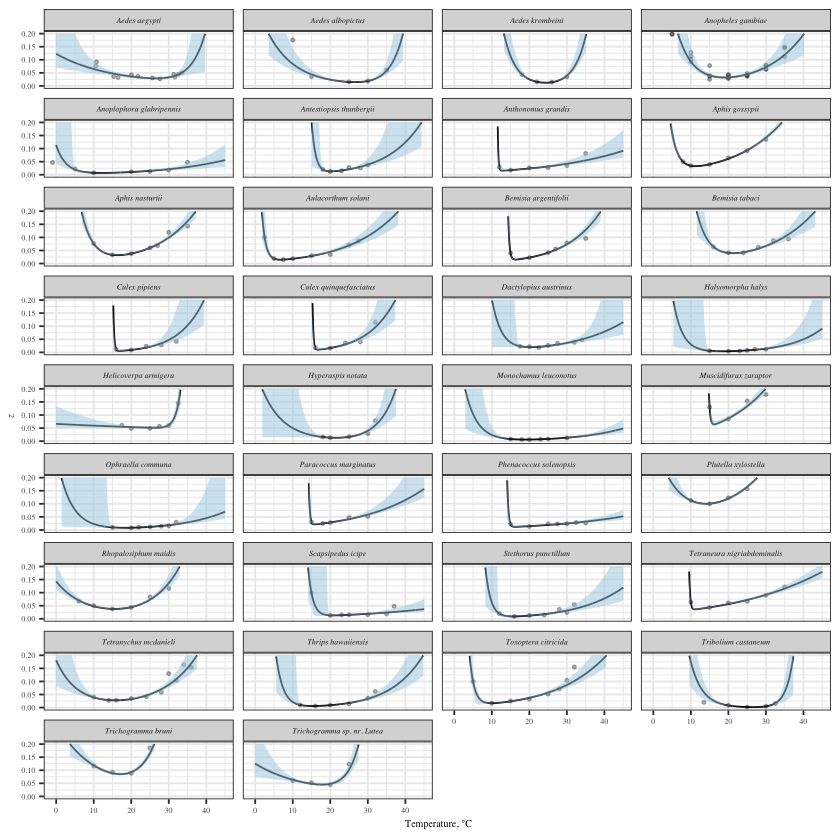

In [15]:
zPlot <- ggplot(zPredictions) +
  geom_line(aes(temp, z)) +
  geom_point(aes(temp, z), dv, size = 0.75, alpha =0.3) +
  facet_wrap(~species, ncol = 4)+
  scale_y_continuous(limits=c(-0.001,0.2))+
  theme_bw() +
  geom_ribbon(aes(temp, ymin=zLwr, ymax=zUpr), zPredictions, fill="#a6cee3",alpha=0.5,
              inherit.aes = T)+
  theme(text = element_text(size=6, family='Times'))+theme(strip.text = element_text(face = "italic"))+
  labs(y=expression(italic(z)), x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none'); zPlot

save_plot(zPlot, file="../results/SI/zFits.pdf", 
          base_height=20,base_width = 14, base_asp = 0.75,units="cm")


## Distributions of Trait $T_{pk}$s and activation energies

In [16]:
####### Distributions of Trait $T_{pk}$s and activation energies ####### 

# Tpks for all species

alpha   <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv', header = TRUE))
zj      <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv', header = TRUE))
z       <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv', header = TRUE))
bmax    <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv', header = TRUE))

topt  <- rbind(alpha,zj,z,bmax)

head(topt)

X,param,conf_lower,conf_upper,method,estimate,species,trait
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,rmax,0.1148495,0.1778902,residual bootstrap,0.1309269,Aedes albopictus,juvenile development rate
2,topt,29.8737413,33.5605898,residual bootstrap,31.1600000,Aedes albopictus,juvenile development rate
3,ctmin,-2.7340000,9.3644365,residual bootstrap,4.2840000,Aedes albopictus,juvenile development rate
4,ctmax,35.9970992,45.0527747,residual bootstrap,41.1210000,Aedes albopictus,juvenile development rate
5,thermal_safety_margin,2.6073458,14.8214061,residual bootstrap,9.9610000,Aedes albopictus,juvenile development rate
6,thermal_tolerance,30.9724764,46.4300000,residual bootstrap,36.8370000,Aedes albopictus,juvenile development rate


In [17]:
topt  <- bind_rows(alpha,zj,z,bmax) %>%
         mutate(species = as.factor(species), trait = as.factor(trait))

toptz <- topt %>% filter(param == 'topt') 

#levels(toptz$species)
#levels(toptz$trait)

toptz$trait <- fct_relevel(toptz$trait, "juvenile mortality rate")

toptz <- toptz %>% filter(param!= "rmax")

SpCount <- table(toptz$species)
RmSp    <- names(SpCount)[which(SpCount==1)]

#head(toptz)


In [18]:
# change name to add asterisk to match next fig
toptz$species <- as.character(toptz$species)
toptz$species[which(toptz$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
toptz$species[which(toptz$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
toptz$species[which(toptz$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
toptz$species[which(toptz$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
toptz$species[which(toptz$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
toptz$species[which(toptz$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
toptz$species[which(toptz$species=="Aedes aegypti")] <- "**Aedes aegypti***"
toptz$species[which(toptz$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
toptz$species[which(toptz$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
toptz$species[which(toptz$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
toptz$species[which(toptz$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
toptz$species[which(toptz$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
toptz$species[which(toptz$species=="Aphis gossypii")] <- "**Aphis gossypii***"
toptz$species[which(toptz$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
toptz$species[which(toptz$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
toptz$species[which(toptz$species=="Scapsipedus icipe")] <- "**Scapsipedus icipe***"
toptz$species[which(toptz$species=="Hyperaspis notata")] <- "**Hyperaspis notata***"
toptz$species[which(toptz$species=="Toxoptera citricida")] <- "**Toxoptera citricida***"
toptz$species[which(toptz$species=="Ophraella communa")] <- "**Ophraella communa***"
toptz$species[which(toptz$species=="Bemisia argentifolii")] <- "**Bemisia argentifolii***"
toptz$species[which(toptz$species=="Dactylopius austrinus")] <- "**Dactylopius austrinus***"
toptz$species[which(toptz$species=="Aulacorthum solani")] <- "**Aulacorthum solani***"

#order by development rate alpha
alp <-     subset(toptz, toptz$trait=="juvenile development rate")
SPorder <- alp$species[order(alp$estimate)]
toptz$species <- factor(toptz$species, levels=SPorder)

#exclude species that don't have alpha
toptz <- filter(toptz, !(species %in% RmSp)) %>%
  filter(species != 'NA', species != 'Plutella xylostella')

## All traits

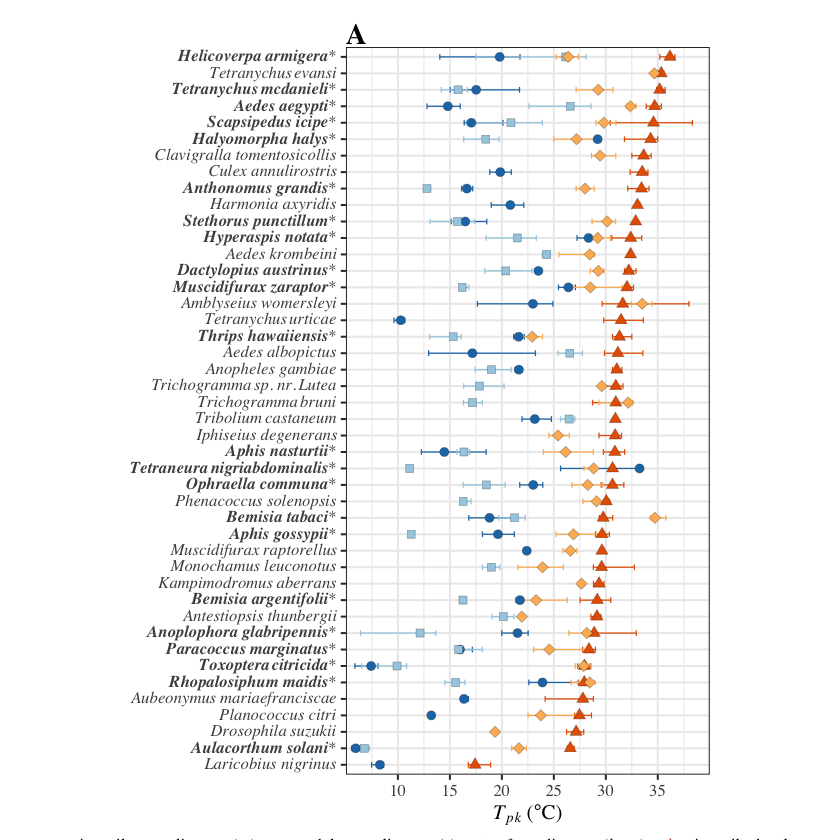

In [19]:
T_pksPlot <- ggplot(toptz, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,linewidth=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(paste(italic(T[pk])~"(",degree,"C)")),
                     limits =c(5,40),
                     expand = c(0, 0),
                     breaks=seq(10,35, by=5))+
  scale_fill_manual(labels = c(expression(plain(paste("juvenile mortality rate (",italic(z[J]),")"))),
                               expression(plain(paste("adult mortality rate (",italic(z),")"))),
                               expression(plain(paste("fecundity rate (",italic(b[max]),")"))),
                               expression(plain(paste("juvenile development rate (","1/",italic(alpha),")")))),
                    values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow = 1,ncol =4,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(labels = c(expression(plain(paste("juvenile mortality rate (",italic(z[J]),")"))),
                                 expression(plain(paste("adult mortality rate (",italic(z),")"))),
                                 expression(plain(paste("fecundity rate (",italic(b[max]),")"))),
                                 expression(plain(paste("juvenile development rate (","1/",italic(alpha),")")))),
                      values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=4,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(labels = c(expression(plain(paste("juvenile mortality rate (",italic(z[J]),")"))),
                                expression(plain(paste("adult mortality rate (",italic(z),")"))),
                                expression(plain(paste("fecundity rate (",italic(b[max]),")"))),
                                expression(plain(paste("juvenile development rate (","1/",italic(alpha),")")))),
                     values = c(21,22,23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =4,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = c(0.35,-0.1),legend.text = element_text(size = 10),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  # coord_fixed(ratio = 1.5)
  theme(aspect.ratio=2)+
  ggtitle("A")+
  theme(plot.title=element_text(face="bold", size = 17.5, vjust = -1))

T_pksPlot

## Activation energies ($E$)

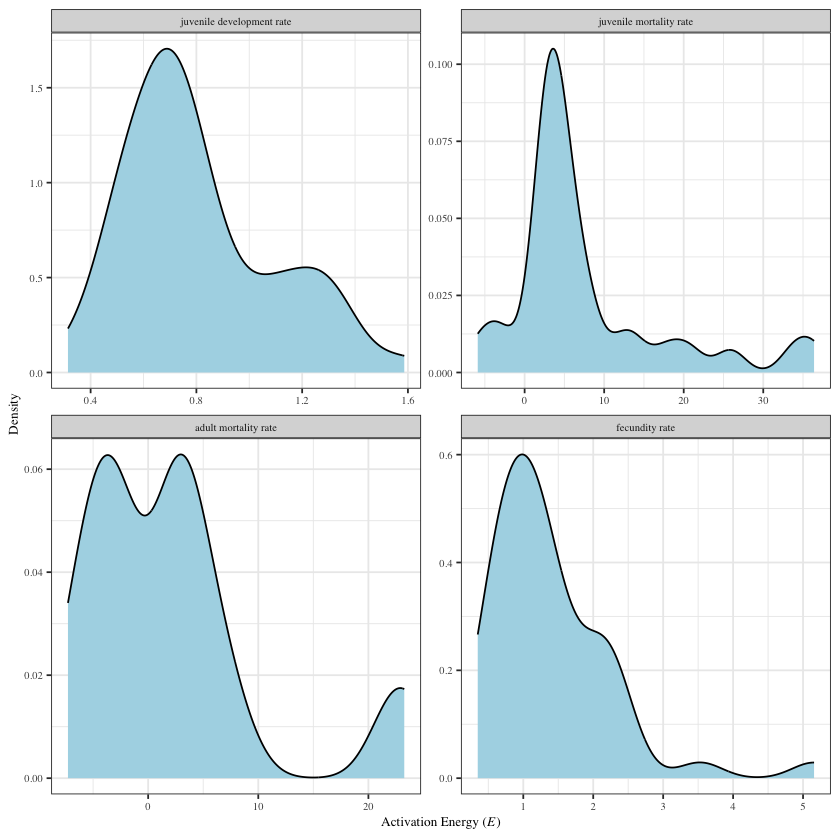

In [20]:
E <-  filter(topt, trait == 'juvenile development rate' | trait == 'fecundity rate', param =="e")  
Eh <- filter(topt, trait == 'juvenile mortality rate' | trait == 'adult mortality rate', param =="eh") %>%
  mutate(param=replace(param, param=='eh', 'e')) %>%
  filter(estimate > -8 & estimate < 50)



activation_e <- bind_rows(E, Eh) %>%
                mutate(trait = factor(trait, levels = c('juvenile development rate',
                                                        'juvenile mortality rate', 
                                                        'adult mortality rate',
                                                        'fecundity rate')))

eplot <- ggplot(activation_e, aes(x=estimate))+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Activation Energy (",italic(E),")"))))+
  labs(y="Density")+
  geom_density(fill = "lightblue")+
  facet_wrap(.~trait, scales = "free")+
  theme(text = element_text(family = 'Times', size = 8))

eplot

save_plot(eplot, file="../results/SI/eDists.pdf", base_width=4)


In [21]:
# Mean activation energies 

head(topt)

activation_e <-  filter(topt, trait == 'juvenile development rate' |
                          trait == 'fecundity rate', param =="e")  

# change name to add asterisk to match next fig
activation_e$species <- as.character(activation_e$species)
activation_e$species[which(activation_e$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
activation_e$species[which(activation_e$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
activation_e$species[which(activation_e$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
activation_e$species[which(activation_e$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
activation_e$species[which(activation_e$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
activation_e$species[which(activation_e$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
activation_e$species[which(activation_e$species=="Aedes aegypti")] <- "**Aedes aegypti***"
activation_e$species[which(activation_e$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
activation_e$species[which(activation_e$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
activation_e$species[which(activation_e$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
activation_e$species[which(activation_e$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
activation_e$species[which(activation_e$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
activation_e$species[which(activation_e$species=="Aphis gossypii")] <- "**Aphis gossypii***"
activation_e$species[which(activation_e$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
activation_e$species[which(activation_e$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
activation_e$species[which(activation_e$species=="Scapsipedus icipe")] <- "**Scapsipedus icipe***"
activation_e$species[which(activation_e$species=="Hyperaspis notata")] <- "**Hyperaspis notata***"
activation_e$species[which(activation_e$species=="Toxoptera citricida")] <- "**Toxoptera citricida***"
activation_e$species[which(activation_e$species=="Ophraella communa")] <- "**Ophraella communa***"
activation_e$species[which(activation_e$species=="Bemisia argentifolii")] <- "**Bemisia argentifolii***"
activation_e$species[which(activation_e$species=="Dactylopius austrinus")] <- "**Dactylopius austrinus***"
activation_e$species[which(activation_e$species=="Aulacorthum solani")] <- "**Aulacorthum solani***"


X,param,conf_lower,conf_upper,method,estimate,species,trait
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>
1,rmax,0.1148495,0.1778902,residual bootstrap,0.1309269,Aedes albopictus,juvenile development rate
2,topt,29.8737413,33.5605898,residual bootstrap,31.1600000,Aedes albopictus,juvenile development rate
3,ctmin,-2.7340000,9.3644365,residual bootstrap,4.2840000,Aedes albopictus,juvenile development rate
4,ctmax,35.9970992,45.0527747,residual bootstrap,41.1210000,Aedes albopictus,juvenile development rate
5,thermal_safety_margin,2.6073458,14.8214061,residual bootstrap,9.9610000,Aedes albopictus,juvenile development rate
6,thermal_tolerance,30.9724764,46.4300000,residual bootstrap,36.8370000,Aedes albopictus,juvenile development rate


In [22]:
activation_e <- activation_e %>% 
                mutate(trait = factor(trait, levels = c('fecundity rate','juvenile development rate'))) %>%
                mutate(species = factor(species, levels = SPorder))
                                                               
activation_e <- na.omit(activation_e)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


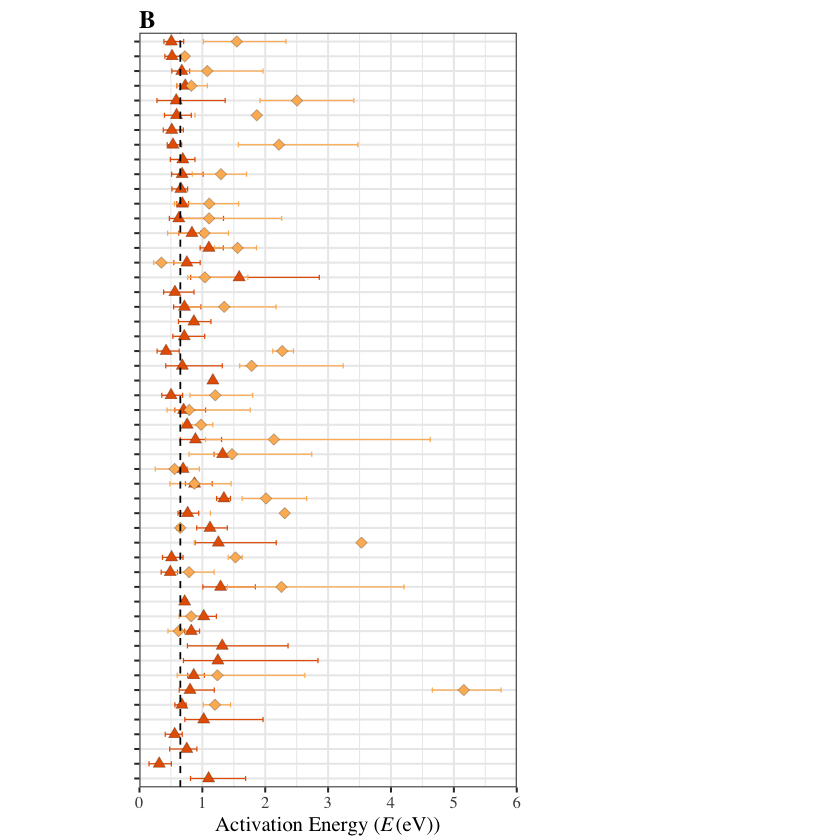

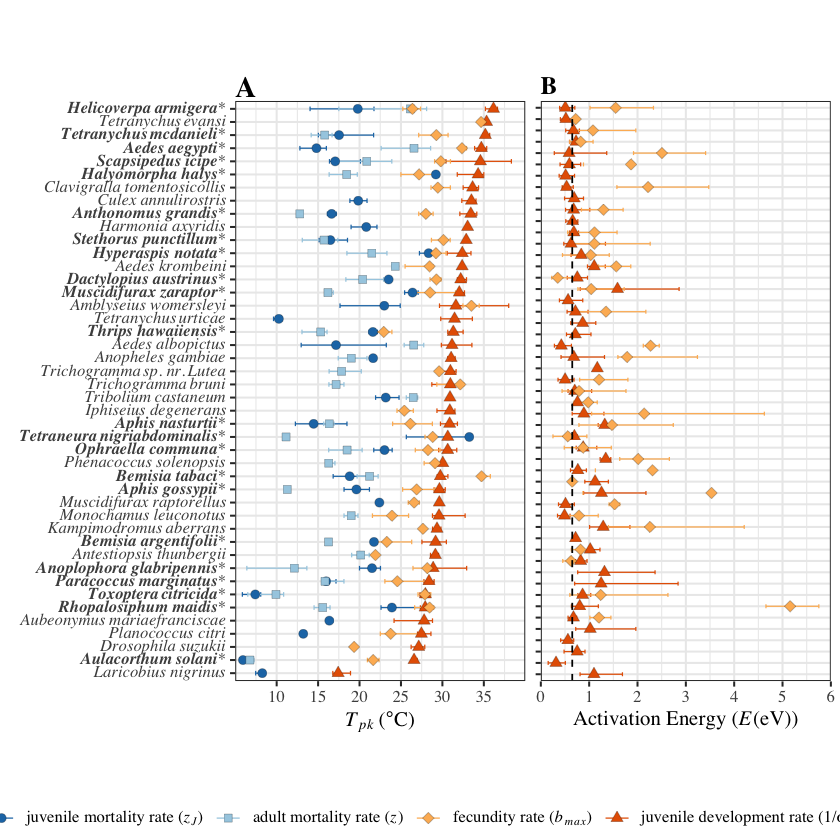

In [23]:
EsPlot <- ggplot(activation_e, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,size=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(plain(paste("Activation Energy (",italic(E),"(eV))"))),
                     limits =c(0,6),
                     expand = c(0, 0),
                     breaks=seq(0,6, by=1))+
  scale_fill_manual(values = c("#fdb863","#e66101"),
                    name=expression(bold("")))+
  scale_colour_manual(values = c("#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(values = c(23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = 'none',legend.text = element_text(size = 8.5),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  geom_vline(xintercept=0.65, lty ='dashed')+
  theme(axis.text.y=element_blank())+
  theme(plot.margin=margin(l=-4,unit="cm"))+
  theme(aspect.ratio=2)+
  ggtitle("B")+
  theme(plot.title=element_text(face="bold", size = 15, vjust = -1))

EsPlot

plotMain <- T_pksPlot + theme(legend.position="none") +
  EsPlot + theme(legend.position="none")

legend <- get_legend(T_pksPlot + theme(legend.position = "bottom"))

Tpks_Es_Plot <- plot_grid(plotMain, legend,ncol = 1, rel_heights = c(1, 0.05))

Tpks_Es_Plot

save_plot(Tpks_Es_Plot, file="../results/Tpks_Es_Plot.pdf", base_height=17.5,base_asp=1.5, units="cm")


